In [1]:
### import the following modules:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

## Random Forest Regression based on galaxy magnitudes

1- The first thing is to see the distribution of the data. The input data we are using (in the regression problem) consists of 7 different colors in 7 diffrent columns (inp_redshift.txt). The typical range of the input is [15-26]

column 0== U-B mag
column 1== B-V mag
column 2== V_i mag
column 3== i-z mag
column 4== z-J mag
column 5== J-H mag
column 6== H-K mag


2- The target is a table with one column (tar_redshift.txt). The redshift interval is [0- 1.5]

3 - The goal is to predict redshift using the 7 coulumns as input data. We will use the random forest model.

## For more information about the data see Santini et al. 2009 

Text(0, 0.5, 'N')

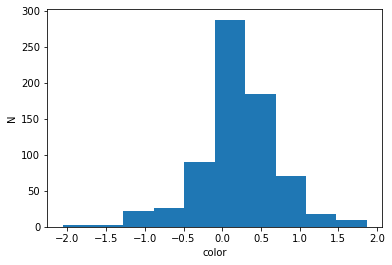

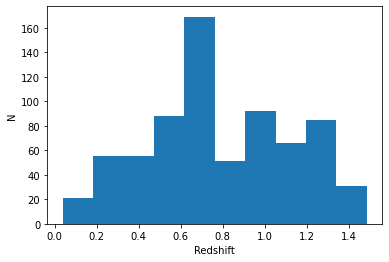

In [3]:
## load the data in order to inspect data and see the distributions: 

inp1 = np.load('inp_redshift.npy')
tar1 = np.load('tar_redshift.npy')

## see the distribution of U mag, for example:

plt.figure(1)
plt.hist(inp1[:,0])
plt.xlabel('color')
plt.ylabel('N')

## see the distribution of target (the redshift distribution):
plt.figure(2)
plt.hist(tar1)
plt.xlabel('Redshift')
plt.ylabel('N')

In [4]:
## Generally, a data set should be divided into two sets: Training (tr) and Validation (va) sets. 

#### here we split the data set into tarning (X_tr, Y_tr) and validation sets (X_va, Y_va). X_ and Y_ are  input and target, respectively: 

X_tr1, X_va1, Y_tr1, Y_va1 = train_test_split(inp1, tar1, test_size=0.3)
print ('shape inp (magnitudes) == ', np.shape(inp1))
print ('shape tar (redshift) == ', np.shape(tar1))

print ('shape X_tr1 , Y_tr1 (trining set (input and target, respectively) == ', np.shape(X_tr1),np.shape(Y_tr1))
print ('shape X_va1 , Y_va1 (Validation set (input and target, respectively) == ', np.shape(X_va1),np.shape(Y_va1))

shape inp (magnitudes) ==  (713, 7)
shape tar (redshift) ==  (713,)
shape X_tr1 , Y_tr1 (trining set (input and target, respectively) ==  (499, 7) (499,)
shape X_va1 , Y_va1 (Validation set (input and target, respectively) ==  (214, 7) (214,)


Text(0.5, 1.0, 'Training (MinMax normalized mag)')

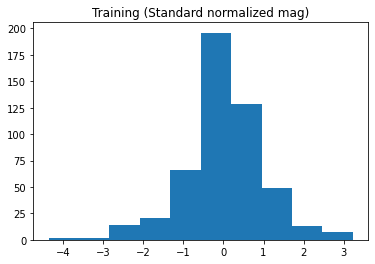

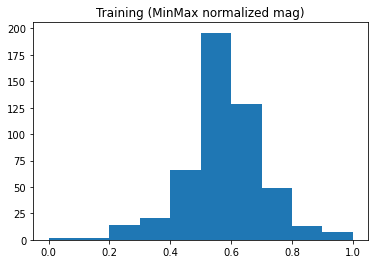

In [5]:
## Generally, before training a model, we should normalize the X_tr and X_va. 


## Here, we present two different normalization method. In any case, frist, use a function (scaler), to fit data, by training set, 
## and then use the fitted function to normalize (transform) all inputs (i.e., tr and va or any test set).

## standard normalization:
scaler_S= preprocessing.StandardScaler().fit(X_tr1)  
X_tr1= scaler_S.transform(X_tr1) 
X_va1= scaler_S.transform(X_va1)


## Here we see the distribution of normalized training and validation sets and can compare them with the original distribution above.

## the distribution of (Standatrd) normalized U mag, for example:
plt.figure(1)
plt.hist(X_tr1[:,0]) 
plt.title('Training (Standard normalized mag)')


## the distribution of (MIN-Max) normalized U mag, for example:
scaler_M= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_tr1)  ## minmax normalization
X_tr1= scaler_M.transform(X_tr1) 
X_va1= scaler_M.transform(X_va1)


plt.figure(2)
plt.hist(X_tr1[:,0]) 
plt.title('Training (MinMax normalized mag)')



## The Random Forest model and the parametrs in (From Scikit-learn):



A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

-- n_estimators : integer, optional (default=10)
The number of trees in the forest.

-- criterion : string, optional (default=”mse”)
The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.

-- max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

-- min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

-- min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

-- max_leaf_nodes : int or None, optional (default=None)
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

-- bootstrap : boolean, optional (default=True)
Whether bootstrap samples are used when building trees.




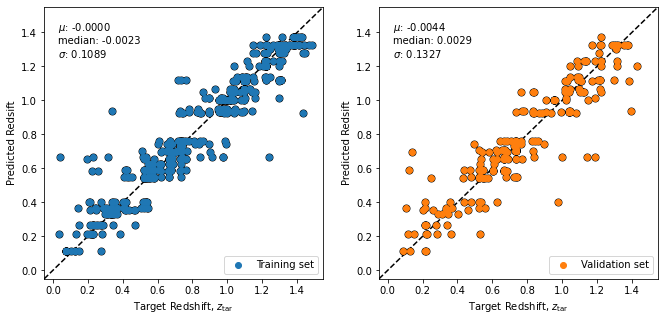

In [6]:



## the  model
# reg= RandomForestRegressor(n_estimators=100, max_depth=None,
#                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
#                            bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
#                            verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)



reg =RandomForestRegressor(n_estimators=1, max_depth=100,min_samples_leaf=10, bootstrap=False,criterion="mse")



## fitting step
reg.fit(X_tr1, Y_tr1)

## predict for any data set. Here training and validation sets
PY_tr1=reg.predict(X_tr1)
PY_va1=reg.predict(X_va1)



##print(reg.feature_importances_)



## plotting the scatter plots and comparing them (i.e., tr and va sets)


def mu_med_sig(pre,tar):
    mu = np.mean(pre-tar)
    med = np.median(pre-tar)
    std = np.std(pre-tar)
    return mu,med,std


fig,axarr = plt.subplots(1,2,figsize=(11,5))



axarr[0].scatter(Y_tr1,PY_tr1,edgecolor='black',linewidths=2,facecolor=None)
axarr[0].scatter(Y_tr1,PY_tr1,facecolor='C0',label='Training set')
axarr[0].set_xlabel('Target Redshift, $z_{\mathrm{tar}}$')
axarr[0].set_ylabel('Predicted Redsift')
axarr[0].legend(loc=4)
mu,med,sig = mu_med_sig(PY_tr1,Y_tr1)
axarr[0].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[0].transAxes)

axarr[1].scatter(Y_va1,PY_va1,edgecolor='black',linewidths=2,facecolor=None)
axarr[1].scatter(Y_va1,PY_va1,facecolor='C1',label='Validation set')
axarr[1].set_xlabel('Target Redshift, $z_{\mathrm{tar}}$')
axarr[1].set_ylabel('Predicted Redsift')
axarr[1].legend(loc=4)
mu,med,sig = mu_med_sig(PY_va1,Y_va1)
axarr[1].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[1].transAxes)

for ax in axarr:
    xmin,xmax=-0.05,1.55
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(xmin,xmax)
    ax.plot([xmin,xmax],[xmin,xmax],color='black',ls='dashed',zorder=-1)
    
#fig.savefig('RF-regression_colours.pdf',bbox_inches='tight')

# The Random Forest model and the parametrs in (From Scikit-learn):¶
# A random forest classifier.
## Data:  Table 1 from  Teimoorinia et al. 2017

## The input data: 

0 == MASS
1 == Mu
2 == Mg
3 == Mr
4 == Mi
5 == Mz
6 == g -r
7 == U*i
8 == SFR
9 == Mhalo
10 == dp5_norm
11 == rhlaf_kpc_r
12 == B/T
13 == rd_disk
14 == sSFR


## The target: 

detections == 1 non-detections==0 (a array of just  0 or 1)









Text(0.5, 1.0, 'Area Under the Curve = 0.835')

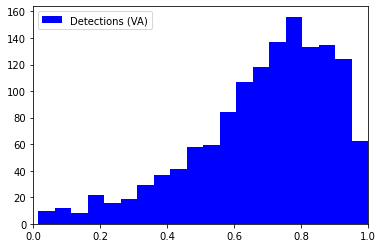

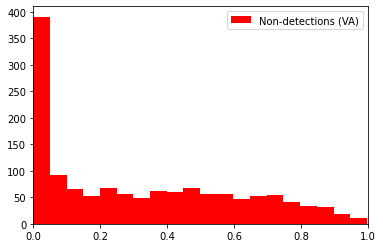

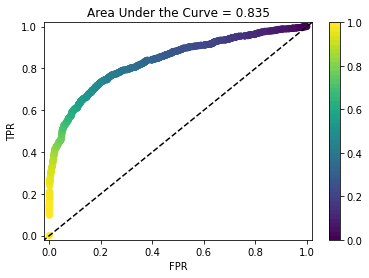

In [7]:
# load the data 

inp = np.load('inp_alfalfa.npy')
tar = np.load('tar_alfalfa.npy')

## one-hot coding (for target) 
ohe = OneHotEncoder(sparse=False)
tar= np.reshape(tar,(-1,1))
tar = ohe.fit_transform(tar)
#print tar 
## split the data into tr and va

X_tr, X_va, Y_tr, Y_va = md.train_test_split(inp,tar, test_size=0.2)#, random_state=42)

## fit a function to the training set and then use the fitted function to normalize (transform) all inputs (here, tr and va )

## choose one of the following functions to normalize input data
## 1-  standard normalization: 
scaler_s= preprocessing.StandardScaler().fit(X_tr)
X_tr= scaler_s.transform(X_tr) 
X_va= scaler_s.transform(X_va)

## 2- Min Max normalization: 
#scaler_m= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_tr)
#X_tr= scaler_m.transform(X_tr) 
#X_va= scaler_m.transform(X_va)



## The model:

RFclass= RandomForestClassifier(n_estimators=10, criterion='entropy',
                              max_depth=100,
                              min_samples_leaf=10,
                              max_features='auto', max_leaf_nodes=None,
                              min_impurity_decrease=0.,
                              min_impurity_split=None,
                              bootstrap=True,
                              n_jobs=None, 
                              verbose=0)
## fitting the model:
RFclass.fit(X_tr, Y_tr)

## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
PY_tr_prob = RFclass.predict_proba(X_tr)
PY_tr = RFclass.predict(X_tr)

PY_va_prob = RFclass.predict_proba(X_va)
PY_va = RFclass.predict(X_va)




####----------------------------------------------------------------------
## Plot the prediccted distributions for the validation set 

plt.figure(1)
plt.hist(PY_va_prob[0][Y_va[:,0]==0,0],20,color = "blue",)
plt.xlim([0,1])
plt.legend(['Detections (VA)'])



plt.figure(2)
plt.hist(PY_va_prob[0][Y_va[:,0]==1,0],20,color = "red",)
plt.xlim([0,1])
plt.legend(['Non-detections (VA)'])


## ----------------------------------------------------------------------
## plot ROC  and estimate the are under the curve for the validation set

fpr = dict()
tpr = dict()
T=dict()
roc_auc = dict()

for i in range(2):
    tpr[i], fpr[i], T[i] = roc_curve(Y_va[:, i], PY_va_prob[0][:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


    
    
plt.figure(3)



cmap = cm.get_cmap("viridis",50)
plt.scatter(fpr[1], tpr[1], c=T[1],cmap=cmap,vmin=0.,vmax=1)
plt.colorbar()
plt.plot([-0.2,1.2],[-0.2,1.2], '--k')
plt.xlim([-.02,1.02])
plt.ylim([-.02,1.02])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Area Under the Curve = %.3f' %roc_auc[0])








Normalized confusion matrix
[[0.82 0.18]
 [0.29 0.71]]


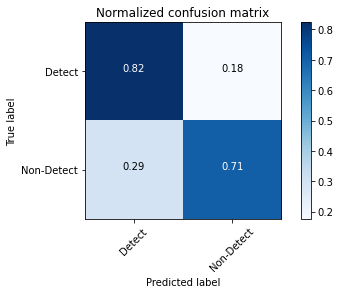

In [8]:
###----------------------------------------------------------------------
## plot the confusion matrix for the validation set



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Compute confusion matrix
cnf_matrix = confusion_matrix( Y_va[:,0],PY_va[:,0])
np.set_printoptions(precision=2)

##Plot non-normalized confusion matrix
#plt.figure(4)
#plot_confusion_matrix(cnf_matrix, classes=['Detect', 'Non-Detect'],
#                        title='Confusion matrix, without normalization')

## Plot normalized confusion matrix
plt.figure(4)
plot_confusion_matrix(cnf_matrix, classes=['Detect', 'Non-Detect'], normalize=True,
                      title='Normalized confusion matrix')

plt.plot(legend=None)

plt.show()





In [9]:
h1= RFclass.feature_importances_

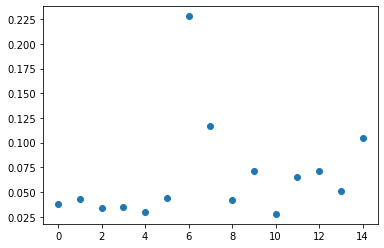

In [10]:
plt.plot(h1,'o')